In [3]:
import re
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
import collections
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.cross_validation import train_test_split

######### Reading file
df = pd.read_csv('C:/Users/Anupama/Documents/4thsem/THESIS/requirementEDA.csv',sep=',')
print("Data basic description:")
print(df.describe())
print("Data column")
print(df.columns)



Data basic description:
          novelty   creativity      clarity       useful   usefulness
count  2884.00000  2884.000000  2883.000000  2882.000000  2883.000000
mean      0.31068     3.789875     4.186264    -0.464261     3.902879
std       0.95068     0.957049     0.805295     0.885852     0.843559
min      -1.00000     1.000000     1.000000    -1.000000     1.000000
25%      -1.00000     3.000000     4.000000    -1.000000     3.000000
50%       1.00000     4.000000     4.000000    -1.000000     4.000000
75%       1.00000     4.000000     5.000000     1.000000     4.000000
max       1.00000     5.000000     5.000000     1.000000     5.000000
Describing data
Index(['novelty', 'requirement', 'creativity', 'clarity', 'useful',
       'usefulness', 'domain'],
      dtype='object')


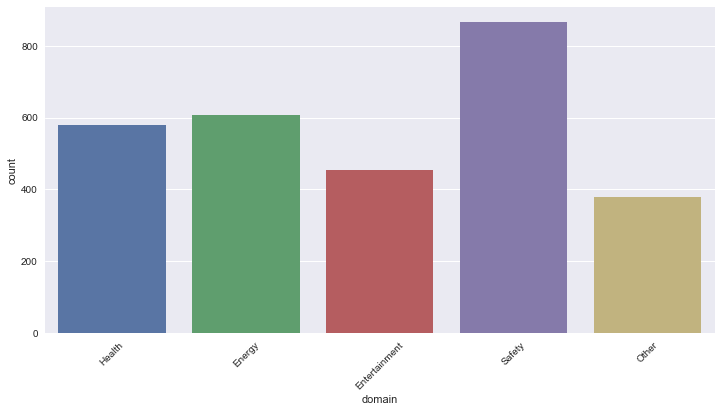

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='domain',data=df)
xt = plt.xticks(rotation=45)
plt.show()


Novelty counts
 1    1890
-1     994
Name: novelty, dtype: int64


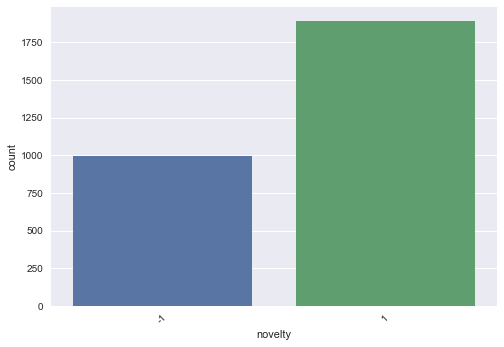

In [7]:
print("Novelty counts")
print(df['novelty'].value_counts())
sns.countplot(x='novelty', data=df)
xt = plt.xticks(rotation=45)
plt.show()
   

Creativity counts
4    1181
3     742
5     706
2     195
1      60
Name: creativity, dtype: int64


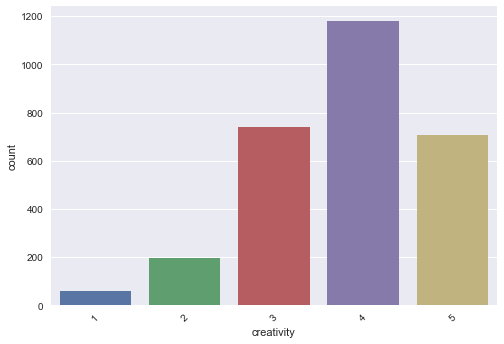

In [8]:
print("Creativity counts")
print(df['creativity'].value_counts())
sns.countplot(x='creativity', data=df)
xt = plt.xticks(rotation=45)
plt.show()

In [10]:
    novelDomains = df.domain[df.novelty == -1]
    print("Number of domains which are novel: ", len(novelDomains))
    domainNames_novel = novelDomains.value_counts().head(5)
    print(domainNames_novel)
    safedomain = domainNames_novel.index[0]
    print("safe values",safedomain)


Number of domains which are novel:  994
Safety           312
Health           199
Energy           190
Entertainment    163
Other            130
Name: domain, dtype: int64
safe values Safety


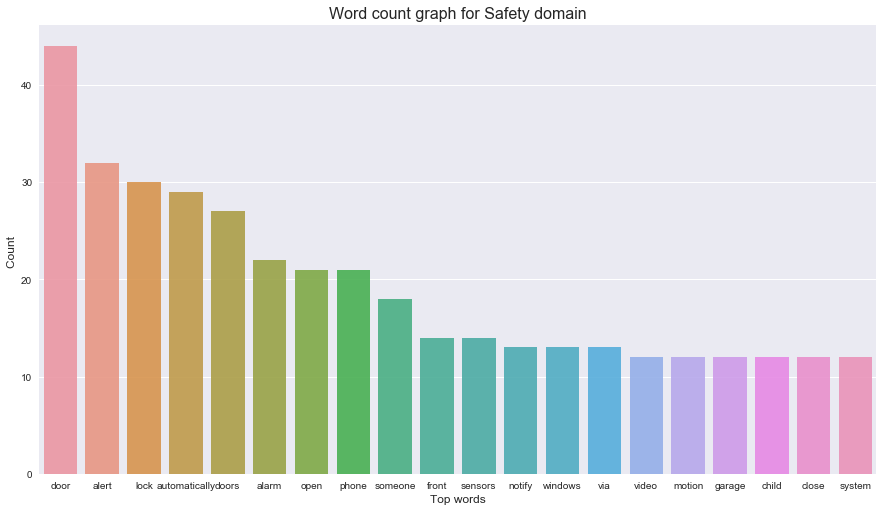

In [18]:
    safetyRequirements_novel = df.requirement[(df.novelty==-1) & (df.domain=="Safety")]
    safetyTopWords = {}
    for sentences in safetyRequirements_novel:
        for word in sentences.split():
            if word not in safetyTopWords:
                safetyTopWords[word]=1
            else:
                safetyTopWords[word]+=1

    safetyTopWords_counter = collections.Counter(safetyTopWords)
    wordDf = []
    wordCountDf =[]
    for topWords,Wordcount in safetyTopWords_counter.most_common(20):
        #print(topWords, ":",Wordcount)
        wordDf.append(topWords)
        wordCountDf.append(Wordcount)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=wordDf, y=wordCountDf, alpha=0.9)
    plt.xticks(rotation='horizontal')
    plt.xlabel('Top words', fontsize=12)
    plt.ylabel('Count ', fontsize=12)
    plt.title("Word count graph for Safety domain", fontsize=16)
    plt.show()


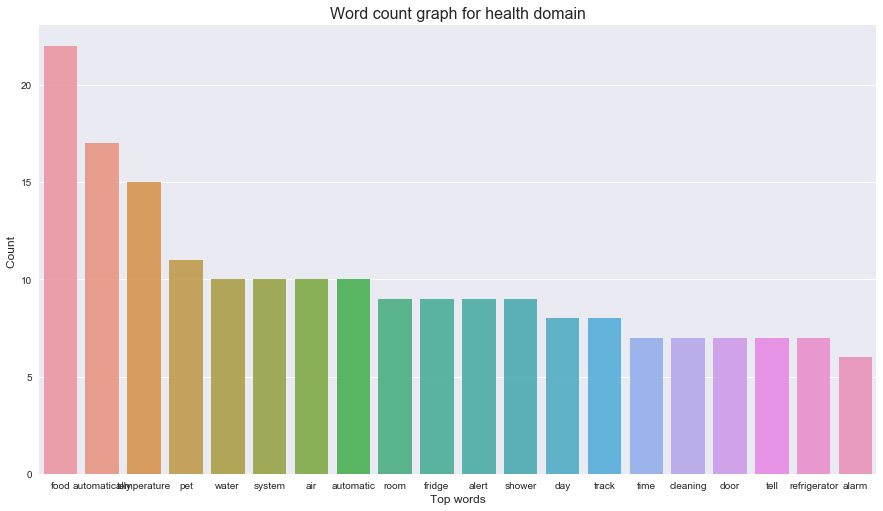

In [14]:
    df = pd.read_csv('C:/Users/Anupama/Documents/4thsem/THESIS/requirementEDA.csv',sep=',')
    healthRequirements_novel = df.requirement[(df.novelty==-1) & (df.domain=="Health")]
    healthTopWords = {}
    for sentences in healthRequirements_novel:
        for word in sentences.split():
            if word not in healthTopWords:
                healthTopWords[word]=1
            else:
                healthTopWords[word]+=1

    healthTopWords_counter = collections.Counter(healthTopWords)
    wordDf = []
    wordCountDf =[]
    for topWords,Wordcount in healthTopWords_counter.most_common(20):
        #print(topWords, ":",Wordcount)
        wordDf.append(topWords)
        wordCountDf.append(Wordcount)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=wordDf, y=wordCountDf, alpha=0.9)
    plt.xticks(rotation='horizontal')
    plt.xlabel('Top words', fontsize=12)
    plt.ylabel('Count ', fontsize=12)
    plt.title("Word count graph for health domain", fontsize=16)
    plt.show()


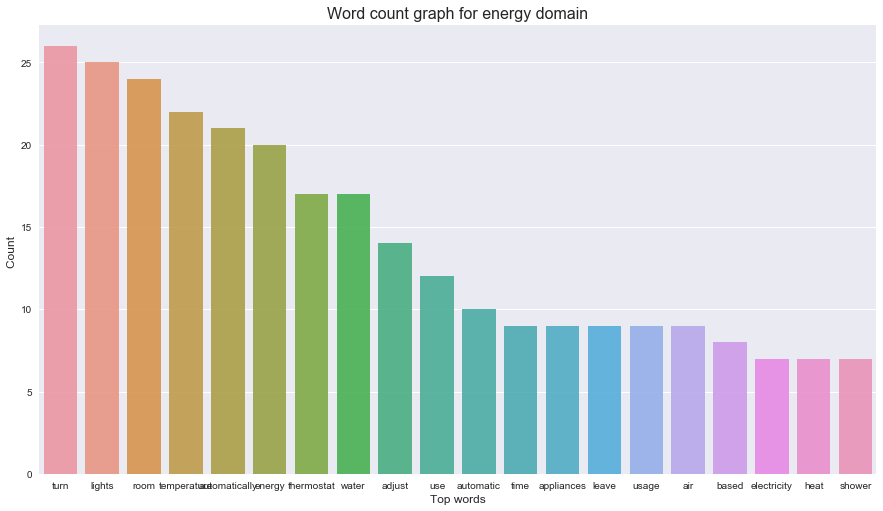

In [17]:
    energyRequirements_novel = df.requirement[(df.novelty==-1) & (df.domain=="Energy")]
    energyTopWords = {}
    for sentences in energyRequirements_novel:
        for word in sentences.split():
            if word not in energyTopWords:
                energyTopWords[word]=1
            else:
                energyTopWords[word]+=1

    energyTopWords_counter = collections.Counter(energyTopWords)
    wordDf = []
    wordCountDf =[]
    for topWords,Wordcount in energyTopWords_counter.most_common(20):
        #print(topWords, ":",Wordcount)
        wordDf.append(topWords)
        wordCountDf.append(Wordcount)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=wordDf, y=wordCountDf, alpha=0.9)
    plt.xticks(rotation='horizontal')
    plt.xlabel('Top words', fontsize=12)
    plt.ylabel('Count ', fontsize=12)
    plt.title("Word count graph for energy domain", fontsize=16)
    plt.show()


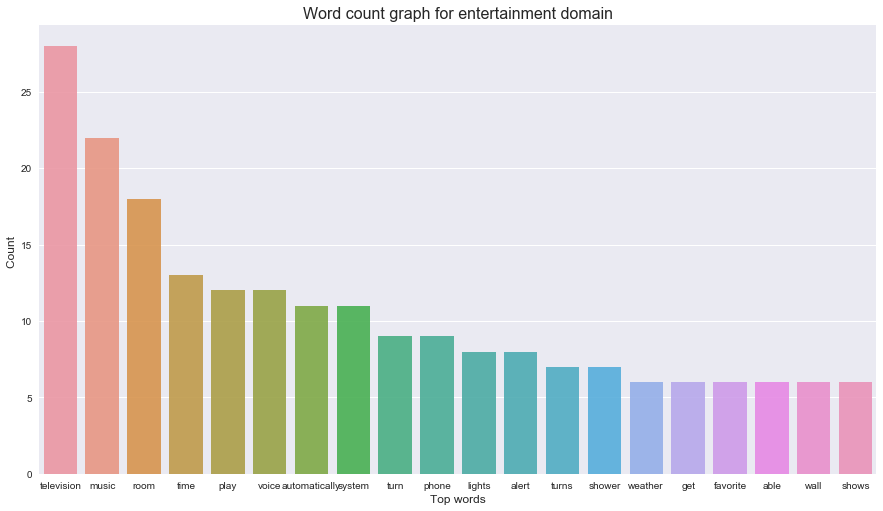

In [20]:
    entertainmentRequirements_novel = df.requirement[(df.novelty==-1) & (df.domain=="Entertainment")]
    entertainmentTopWords = {}
    for sentences in entertainmentRequirements_novel:
        for word in sentences.split():
            if word not in entertainmentTopWords:
                entertainmentTopWords[word]=1
            else:
                entertainmentTopWords[word]+=1

    entertainmentTopWords_counter = collections.Counter(entertainmentTopWords)
    wordDf = []
    wordCountDf =[]
    for topWords,Wordcount in entertainmentTopWords_counter.most_common(20):
        #print(topWords, ":",Wordcount)
        wordDf.append(topWords)
        wordCountDf.append(Wordcount)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=wordDf, y=wordCountDf, alpha=0.9)
    plt.xticks(rotation='horizontal')
    plt.xlabel('Top words', fontsize=12)
    plt.ylabel('Count ', fontsize=12)
    plt.title("Word count graph for entertainment domain", fontsize=16)
    plt.show()

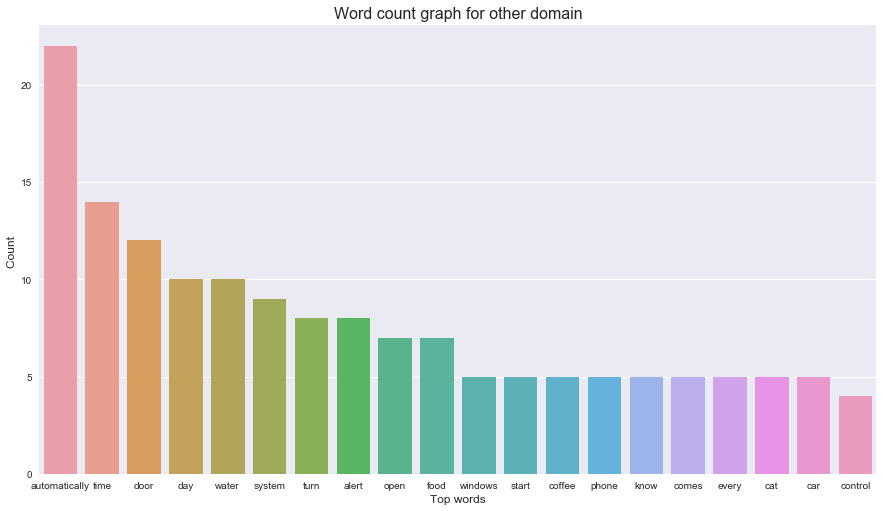

In [21]:
    otherRequirements_novel = df.requirement[(df.novelty==-1) & (df.domain=="Other")]
    otherTopWords = {}
    for sentences in otherRequirements_novel:
        for word in sentences.split():
            if word not in otherTopWords:
                otherTopWords[word]=1
            else:
                otherTopWords[word]+=1

    otherTopWords_counter = collections.Counter(otherTopWords)
    wordDf = []
    wordCountDf =[]
    for topWords,Wordcount in otherTopWords_counter.most_common(20):
        #print(topWords, ":",Wordcount)
        wordDf.append(topWords)
        wordCountDf.append(Wordcount)
    plt.figure(figsize=(15, 8))
    sns.barplot(x=wordDf, y=wordCountDf, alpha=0.9)
    plt.xticks(rotation='horizontal')
    plt.xlabel('Top words', fontsize=12)
    plt.ylabel('Count ', fontsize=12)
    plt.title("Word count graph for other domain", fontsize=16)
    plt.show()